In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from stop_words import get_stop_words
stop_words = get_stop_words('russian')

In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Oleg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation

In [38]:
import sys
np.set_printoptions(threshold=sys.maxsize)
#np.set_printoptions(threshold=False)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

## Get data

In [40]:
data = pd.read_csv('lab2.csv', index_col=0, encoding='utf-8')

In [41]:
data.index -= 1
data.head()

,channel,text,datetime,label
0,bad kpi,"#фмм, 3 курс мені написала студентка з мого фа...",2019-03-20 04:50:58+02:00,-1
1,good kpi,один из туалетов первого корпуса.\r\n\r\nпоста...,2019-03-21 15:36:38+02:00,1
2,bad kpi,#фмм #гребньов\r\nще трохи про гребньова\r\nна...,2019-03-20 07:44:01+02:00,-1
3,good kpi,"#итс \r\n1 курс\r\n\r\nскорее на хороший кпи, ...",2019-04-09 21:34:19+03:00,1
4,bad kpi,"#фмм, 3 курс\r\nпомню тоже было дело! тот же г...",2019-03-20 07:44:20+02:00,-1


## Clean data

In [42]:
mystem = Mystem() 
russian_stopwords = stopwords.words("russian")
russian_stopwords.append('это')

ukrainian_stopwords = ['з', 'й', 'що', 'та', 'із', 'але', 'цей', 'коли', 'як', 'чого', 'хоча', 'нам', 'якось', 'чи',
                       'це', 'від', 'їх', 'інших', 'ти', 'він', 'вона', 'воно', 'ми', 'ви', 'вони', 'якого', 
                       'яких', 'яким', 'є', 'чому', 'чим', 'де', 'десь', 'собі', 'свій']
stop_words = russian_stopwords + ukrainian_stopwords

In [43]:
def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in stop_words\
              and token != " " \
              and token.strip() not in punctuation]
    
    text = " ".join(tokens)
    
    return text

In [44]:
preprocess_text("Ну что сказать, я вижу кто-то наступил на грабли, Ты разочаровал меня, ты был натравлен.")

'сказать видеть кто-то наступать грабли разочаровывать натравлять'

In [45]:
preprocess_text("По асфальту мимо цемента, Избегая зевак под аплодисменты. Обитатели спальных аррондисманов")

'асфальт мимо цемент избегать зевака аплодисменты обитатель спальный аррондисман'

In [46]:
allowed = 'abcdefghijklmnopqrstuvwxyzабвгдеёжзийклмнопрстуфхцчшщъыьэюяабвгґдеєжзиіїйклмнопрстуфхцчшщьюя'

In [47]:
text = data['text']

In [48]:
def clean_data(data, lemma=False):
    S = []
    for mes in text:
        if lemma:
            mes = preprocess_text(mes)
        mes = mes.split()
        new_mes = ''
        for word in mes:
            word = word.strip()
            new_word = ''
            for i in range(len(word)):
                if word[i] == '\\' or word[i] == '/':
                    new_word += ' '
                elif word[i] in allowed:
                    new_word += word[i]
            if (len(new_word)) > 0:
                new_mes += new_word.strip() + ' '
        S.append(new_mes.strip())
    X = pd.Series(S)
    return X

In [49]:
X = clean_data(text)
X.head()

0    фмм курс мені написала студентка з мого факуль...
1    один из туалетов первого корпуса поставили руч...
2    фмм гребньов ще трохи про гребньова на своїх п...
3    итс курс скорее на хороший кпи чем на плохой п...
4    фмм курс помню тоже было дело тот же гребнев з...
dtype: object

In [50]:
X_lemma = clean_data(text, True)
X_lemma.head()

0    фмм курс мені написать студентка мого факульте...
1    туалет первый корпус поставлять ручка щеколда ...
2    фмм гребньов ще троха гребньово своїх пары про...
3    итс курс скоро хороший кпи плохой преподавател...
4    фмм курс помнить дело гребнев заставлять делат...
dtype: object

In [51]:
y = data['label']

## Split data

In [52]:
X1_train, y1_train = X[:100], y[:100]
X2_train, y2_train = X[:120], y[:120]
X3_train, y3_train = X[:140], y[:140]
X_test, y_test = X[140:], y[140:]

print(len(X1_train))
print(len(X2_train))
print(len(X3_train))
print(len(X_test))

100
120
140
60


In [53]:
X1_train_lemma = X_lemma[:100]
X2_train_lemma = X_lemma[:120]
X3_train_lemma = X_lemma[:140]
X_test_lemma = X_lemma[140:]

print(len(X1_train_lemma))
print(len(X2_train_lemma))
print(len(X3_train_lemma))
print(len(X_test_lemma))

100
120
140
60


## Help functions

In [54]:
def plot_hist(df, labels, cv, c, num=10):
    import random
    df = df[labels[labels == c].index]
    ind = np.argpartition(df.toarray().sum(axis=0), -num)[-num:]
    values = df.toarray().sum(axis=0)[ind]
    words = np.array(cv.get_feature_names())[ind]
    
    n = len(ind)
    all_colors = list(plt.cm.colors.cnames.keys())
    random.seed(100)
    c = random.choices(all_colors, k=n)

    # Plot Bars
    plt.figure(figsize=(16,10), dpi= 80)
    plt.bar(words, values, color=c, width=.5)
    for i in range(len(ind)):
        plt.text(i, values[i], words[i], horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

    # Decoration
    plt.gca().set_xticklabels(values, rotation=90, horizontalalignment= 'right')
    plt.title('Most popular words', fontsize=22)
    plt.ylabel('Frequency')
    #plt.ylim(0, 0.5)
    plt.show()

In [55]:
def num_doc_c(labels, c):
    return labels[labels == c].count()  

In [56]:
def num_unique_words(cv):
    return len(cv.get_feature_names())

In [57]:
def num_words_c(data, labels, c):
    return data[labels[labels == c].index].sum()

In [58]:
def num_word_c(cv, word, data, labels, c):
    if word not in cv.get_feature_names():
        return 0
    index = cv.get_feature_names().index(word)
    data = data.transpose()[index].transpose()
    return data[labels[labels == c].index].sum()

## Building a model

In [59]:
def transform(data, use_stop_words=False):
    sw = stop_words if use_stop_words else None
    cv = CountVectorizer(stop_words=sw)
    data = cv.fit_transform(data)
    return data, cv

In [60]:
def proba(cv, mes, data, labels):
    predictions = []
    mes_num = cv.transform(mes)
    for i in range(mes.shape[0]):
        prob = []
        for c in labels.unique():
            total = np.log(num_doc_c(labels, c) / labels.shape[0])
            for word in mes.iat[i].split():
                total += np.log((num_word_c(cv, word, data, labels, c) + 1) / 
                                (num_unique_words(cv) + num_words_c(data, labels, c)))
            prob.append(total)
        #print(prob)
        predictions.append(labels.unique()[prob.index(max(prob))])
    return pd.Series(predictions)

In [61]:
def predict(data, labels, data_predict, use_stop_words=False):
    data, cv = transform(data, use_stop_words)
    return proba(cv, data_predict, data, labels), data, cv

In [105]:
def accuracy(y_true, y_pred):
    y_true = y_true.reset_index(drop=True)
    return sum(y_true.sort_index() == y_pred) / len(y_true)

In [63]:
a = pd.Series(['надаю послуги бухгалтера бухгалтера', 'поспішайте купити віагру', 'потрібно купити молока', 
               'потрібно купити цигарки', 'вам треба купити віагру', 'лол'])
b = pd.Series([-1, -1, 1, 1, -1, -1])
#a_train, a_test, b_train, b_test = a[:3], a[3:], b[:3], b[3:]
#accuracy(b_test, predict(a_train, b_train, a_test))

## Training a model

In [106]:
accus = []
accus_new = []

In [65]:
y_new = y.copy()
y_new[y_new == 0] = 1

In [66]:
y1_train_new = y_new[:100]
y2_train_new = y_new[:120]
y3_train_new = y_new[:140]
y_test_new = y_new[140:]

### X1, y1; 3 classes; no lemmatization

In [67]:
%%time
predicted_1, _, _ = predict(X1_train, y1_train, X_test)

Wall time: 1min 45s


In [107]:
acc_1 = accuracy(y_test, predicted_1)
accus.append(round(acc_1, 2))
print(acc_1)

0.4


### X1, y1; 2 classes; no lemmatization

In [69]:
%%time
predicted_1_new, _, _ = predict(X1_train, y1_train_new, X_test)

Wall time: 1min 14s


In [108]:
acc_1_new = accuracy(y_test_new, predicted_1_new)
accus_new.append(round(acc_1_new, 2))
print(acc_1_new)

0.6


### X1, y1; 3 classes; with lemmatization

In [71]:
%%time
predicted_1_lemma, _, _ = predict(X1_train_lemma, y1_train, X_test_lemma)

Wall time: 59.7 s


In [72]:
acc_1_lemma = accuracy(y_test, predicted_1_lemma)
print(acc_1_lemma)

0.4


## --------------

### X2, y2; 3 classes; no lemmatization

In [73]:
%%time
predicted_2, _, _ = predict(X2_train, y2_train, X_test)

Wall time: 2min 19s


In [109]:
acc_2 = accuracy(y_test, predicted_2)
accus.append(round(acc_2, 2))
print(acc_2)

0.4666666666666667


### X2, y2; 2 classes; no lemmatization

In [75]:
%%time
predicted_2_new, _, _ = predict(X2_train, y2_train_new, X_test)

Wall time: 1min 23s


In [110]:
acc_2_new = accuracy(y_test_new, predicted_2_new)
accus_new.append(round(acc_2_new, 2))
print(acc_2_new)

0.5666666666666667


### X2, y2; 3 classes; with lemmatization

In [77]:
%%time
predicted_2_lemma, _, _ = predict(X2_train_lemma, y2_train, X_test_lemma)

Wall time: 56.7 s


In [78]:
acc_2_lemma = accuracy(y_test, predicted_2_lemma)
print(acc_2_lemma)

0.48333333333333334


## --------------

### X3, y3; 3 classes; no lemmatization

In [79]:
%%time
predicted_3, _, _ = predict(X3_train, y3_train, X_test)

Wall time: 2min 18s


In [111]:
acc_3 = accuracy(y_test, predicted_3)
accus.append(round(acc_3, 2))
print(acc_3)

0.4666666666666667


### X3, y3; 2 classes; no lemmatization

In [81]:
%%time
predicted_3_new, _, _ = predict(X3_train, y3_train_new, X_test)

Wall time: 1min 32s


In [112]:
acc_3_new = accuracy(y_test_new, predicted_3_new)
accus_new.append(round(acc_3_new, 2))
print(acc_3_new)

0.6


### X2, y3; 3 classes; with lemmatization

In [83]:
%%time
predicted_3_lemma, _, _ = predict(X3_train_lemma, y3_train, X_test_lemma)

Wall time: 1min 19s


In [84]:
acc_3_lemma = accuracy(y_test, predicted_3_lemma)
print(acc_3_lemma)

0.43333333333333335


## ---------------

## Whole dataset

### no lematization

In [85]:
%%time
predicted, data, cv = predict(X, y, X)

Wall time: 13min 27s


In [86]:
accuracy = accuracy(y, predicted)
accuracy

0.995

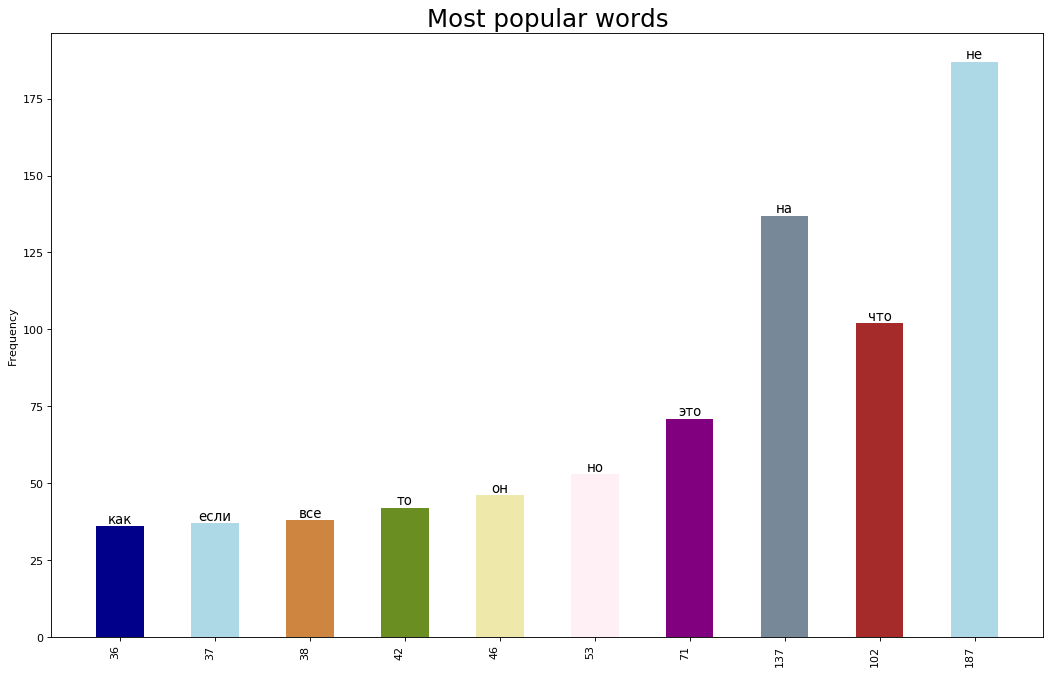

In [87]:
plot_hist(data, y, cv, -1)

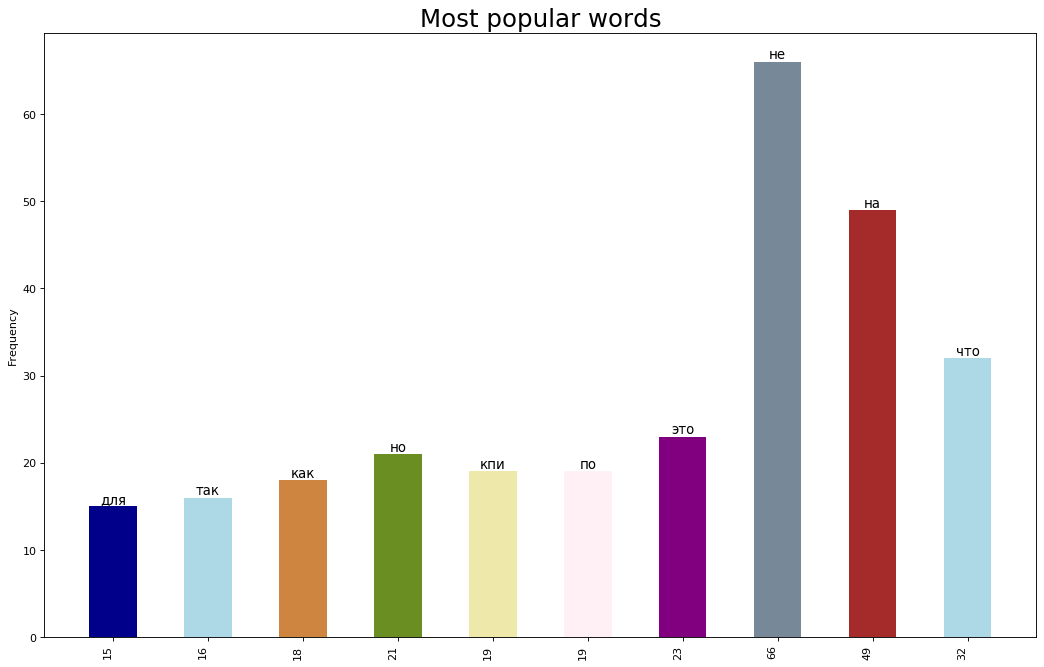

In [88]:
plot_hist(data, y, cv, 0)

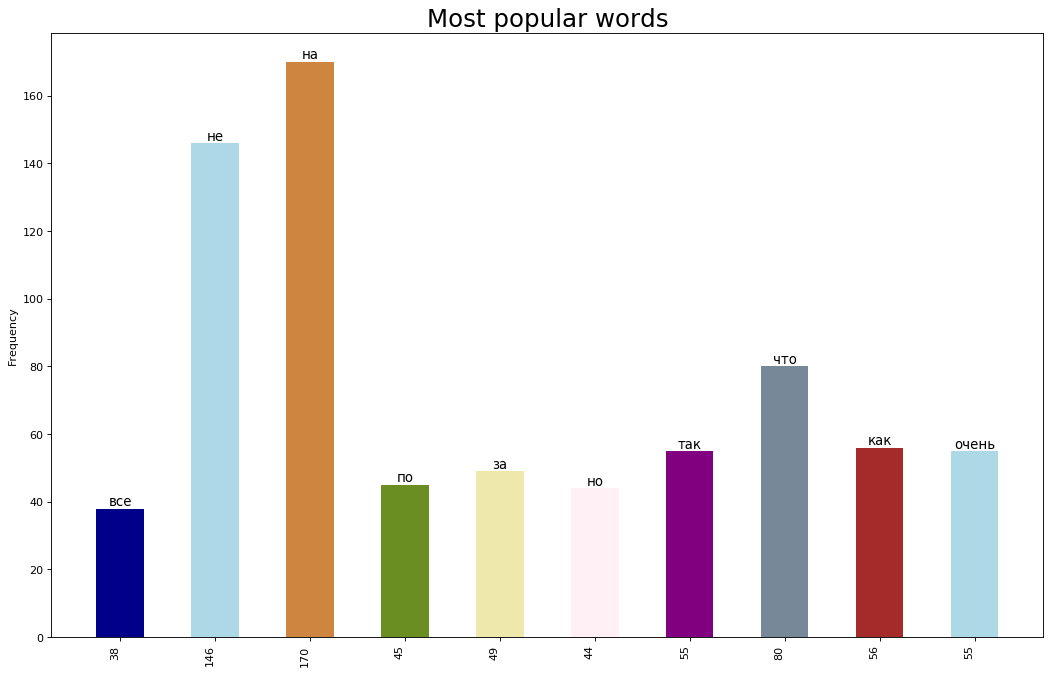

In [89]:
plot_hist(data, y, cv, 1)

### with lemmatization

In [90]:
%%time
predicted_lemma, data, cv = predict(X_lemma, y, X_lemma)

Wall time: 5min 17s


In [93]:
accuracy = accuracy(y, predicted_lemma)
accuracy

0.975

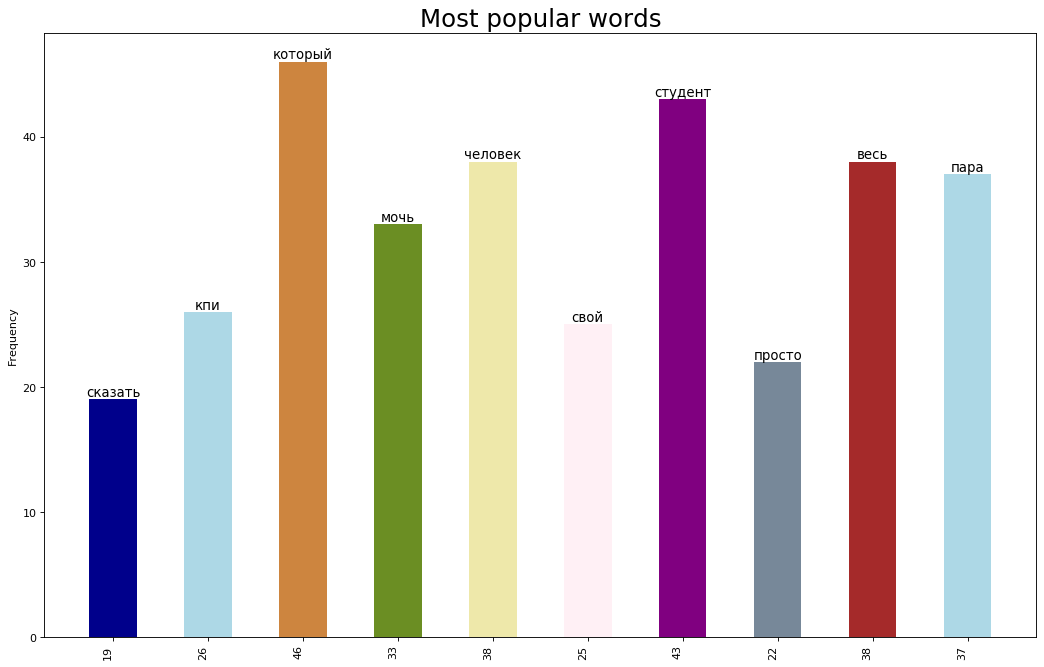

In [94]:
plot_hist(data, y, cv, -1)

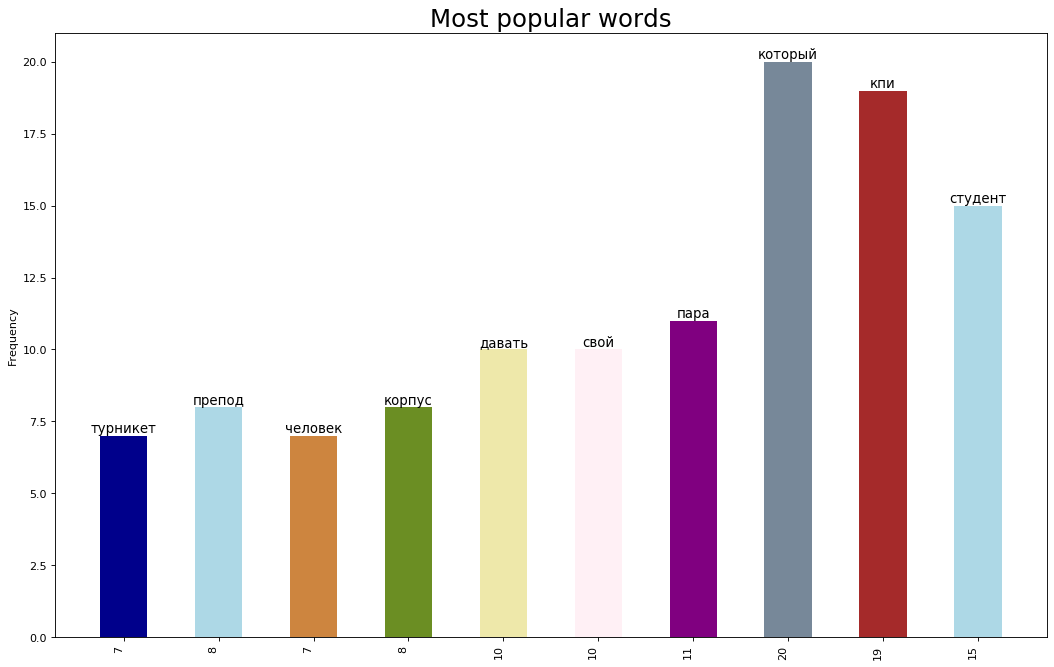

In [95]:
plot_hist(data, y, cv, 0)

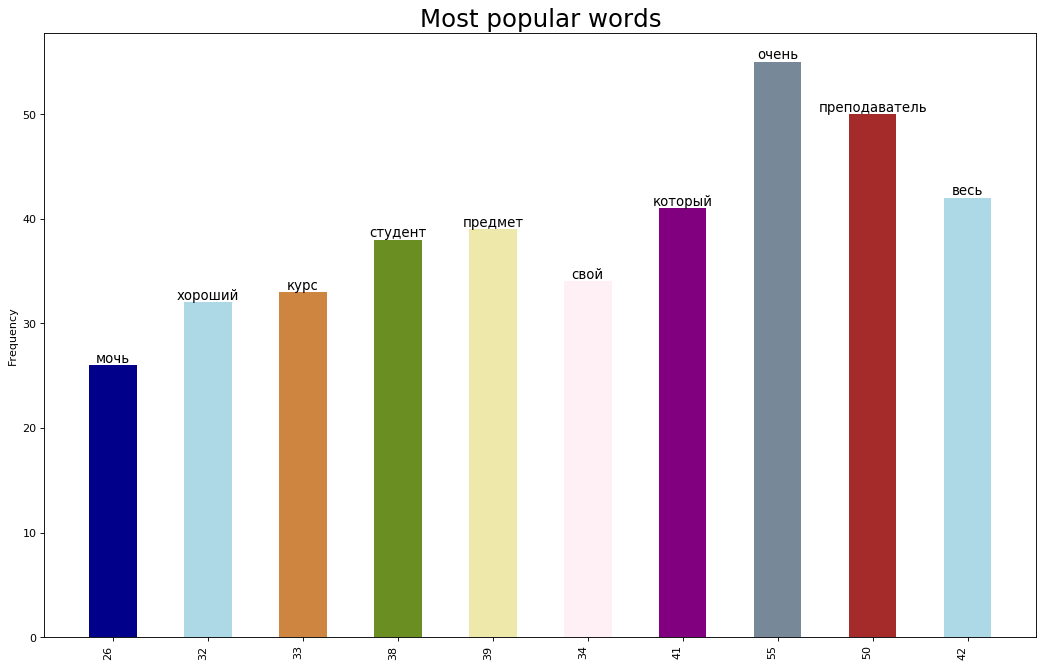

In [96]:
plot_hist(data, y, cv, 1)

## Plot of accuracy

In [113]:
xs = [100, 120, 140]

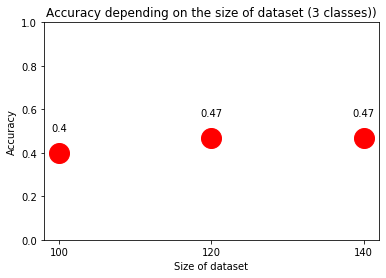

In [114]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(range(len(xs)), accus, 'ro', markersize=20)
plt.xticks(range(len(xs)), xs)
plt.ylim(0, 1)
plt.xlabel('Size of dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy depending on the size of dataset (3 classes))')

for i, v in enumerate(accus):
    ax.text(i, v+0.1, v, ha="center")
plt.show()

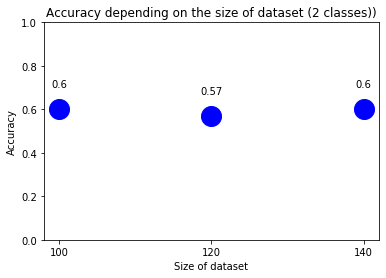

In [115]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(range(len(xs)), accus_new, 'bo', markersize=20)
plt.xticks(range(len(xs)), xs)
plt.ylim(0, 1)
plt.xlabel('Size of dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy depending on the size of dataset (2 classes))')

for i, v in enumerate(accus_new):
    ax.text(i, v+0.1, v, ha="center")
plt.show()